## Download Sample Smart Meter Data

Downloads a sample file referenced on https://www.ckw.ch/lp/opendata.html .

In this case, we refer to one of the files indicated in data set "B", namely aggregated data per zip code.

https://axsa4prod4publicdata4sa.blob.core.windows.net/$web/index.html#dataset-b 

We proceed to retrieve and parse the file and display some excerpts and summary statistics.

In [8]:
import pandas as pd
data = pd.read_csv("https://axsa4prod4publicdata4sa.blob.core.windows.net/$web/ckw_opendata_smartmeter_dataset_b_202210.csv.gz")

Display the sample data using the pandas default renderer:

In [11]:
data

,area_code,timestamp,num_meter,value_kwh
0,4806,2022-10-10T18:15:00.000Z,822,106.95225
1,4806,2022-10-06T18:45:00.000Z,822,92.59300
2,4806,2022-10-01T11:45:00.000Z,822,93.03100
3,4806,2022-10-06T16:45:00.000Z,822,92.15500
4,4806,2022-10-10T08:45:00.000Z,822,76.98200
...,...,...,...,...
136027,6331,2022-10-04T20:30:00.000Z,169,21.27500
136028,6331,2022-10-01T12:45:00.000Z,169,24.21700
136029,6331,2022-10-07T06:15:00.000Z,169,22.14200
136030,6331,2022-10-02T01:15:00.000Z,169,9.49700


Determine the zip codes with the highest turn over in kWh:

In [88]:
toByZip = data.groupby('area_code')['value_kwh'].sum()

top10ZipCodes = toByZip.to_frame().sort_values(by = 'value_kwh', ascending=False).head(10)
top10ZipCodes

,value_kwh
area_code,
6030,826040.915437
6045,608688.274972
6020,537313.800619
6130,520205.895393
6032,443125.244745
6017,409137.665508
6043,396495.265319
6260,347414.081868
6033,333803.010334


In [90]:
topZipCode = top10ZipCodes.iloc[0].name
topZipCode

6030

Time series for the top zip code:

In [96]:
topTs = data.loc[data['area_code'] == topZipCode][["timestamp", "num_meter", "value_kwh"]]
topTs

,timestamp,num_meter,value_kwh
521,2022-10-06T08:00:00.000Z,8164,712.076250
522,2022-10-10T08:15:00.000Z,8163,783.807896
523,2022-10-03T10:00:00.000Z,1486,160.729000
524,2022-10-10T18:00:00.000Z,8164,997.468360
525,2022-10-12T07:30:00.000Z,7419,701.695000
...,...,...,...
135566,2022-10-03T12:15:00.000Z,8105,793.541500
135567,2022-10-03T23:00:00.000Z,8168,729.845000
135568,2022-10-02T20:15:00.000Z,8152,711.779500
135569,2022-10-02T22:45:00.000Z,7826,584.245750


<AxesSubplot:xlabel='timestamp'>

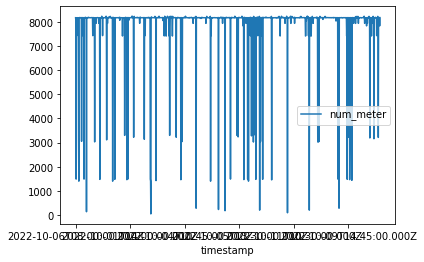

In [99]:
topTs.plot(x="timestamp", y=["num_meter"])

<AxesSubplot:xlabel='timestamp'>

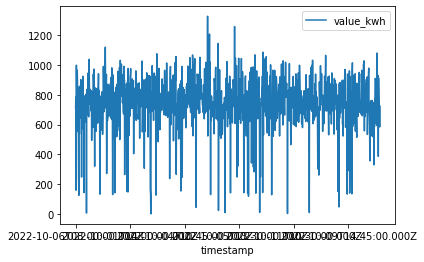

In [100]:
topTs.plot(x="timestamp", y=["value_kwh"])